In [ ]:
import pandas as pd
df_listings = pd.read_csv('listings.csv.gz', compression='gzip')

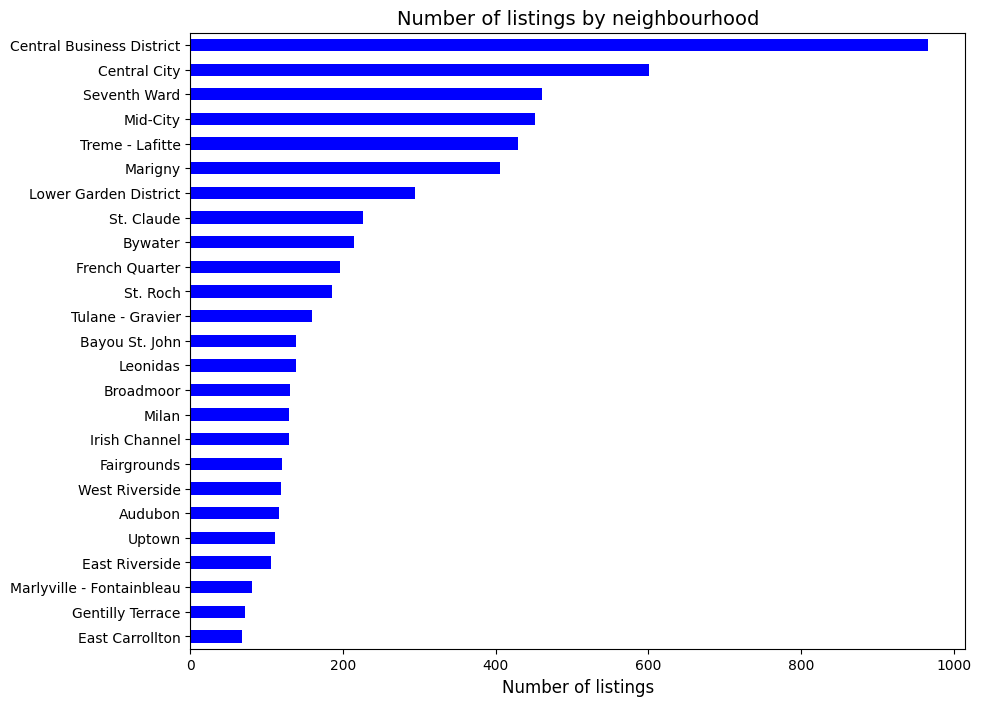

In [ ]:
import matplotlib.pyplot as plt
feq = df_listings['neighbourhood_cleansed'].value_counts().sort_values(ascending=True)
feq = feq[-25:]
feq.plot.barh(figsize=(10,8), color ='b', width= 0.5)
plt.title('Number of listings by neighbourhood', fontsize=14)
plt.xlabel('Number of listings', fontsize = 12)
plt.show()

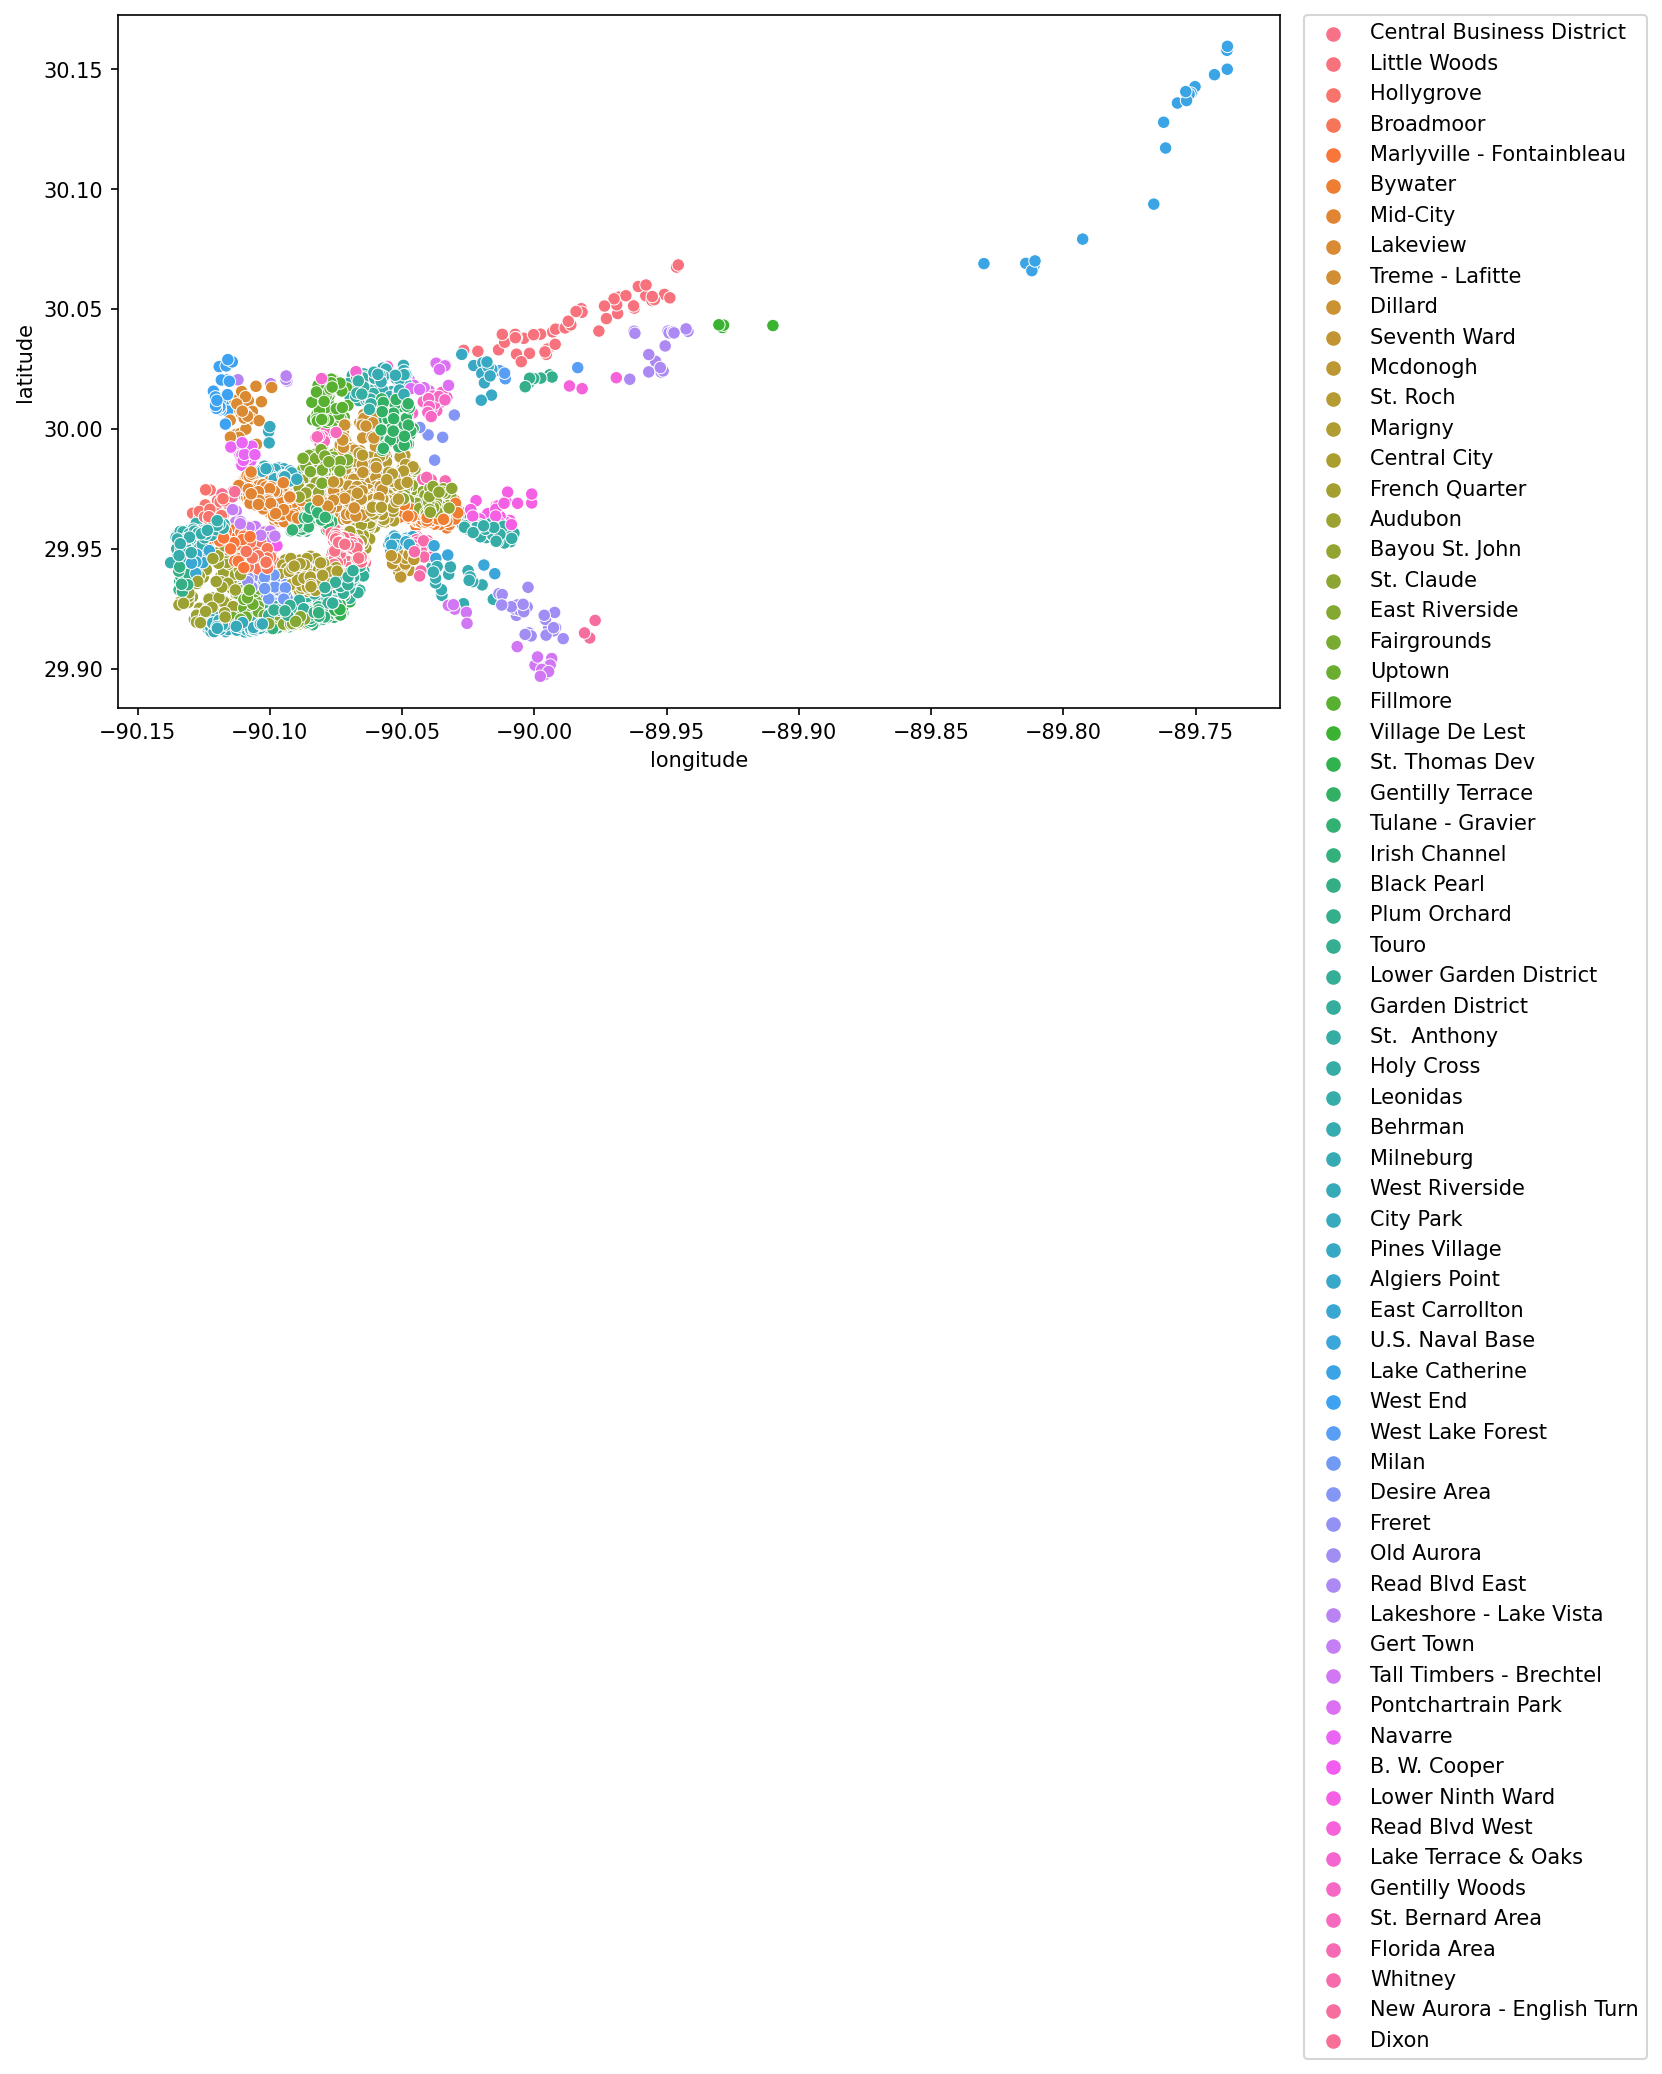

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6), dpi = 150)
sns.scatterplot(x = df_listings.longitude,y = df_listings.latitude, hue=df_listings.neighbourhood_cleansed
)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

In [18]:
df_listings.room_type.unique()

array(['Hotel room', 'Private room', 'Entire home/apt', 'Shared room'],
      dtype=object)

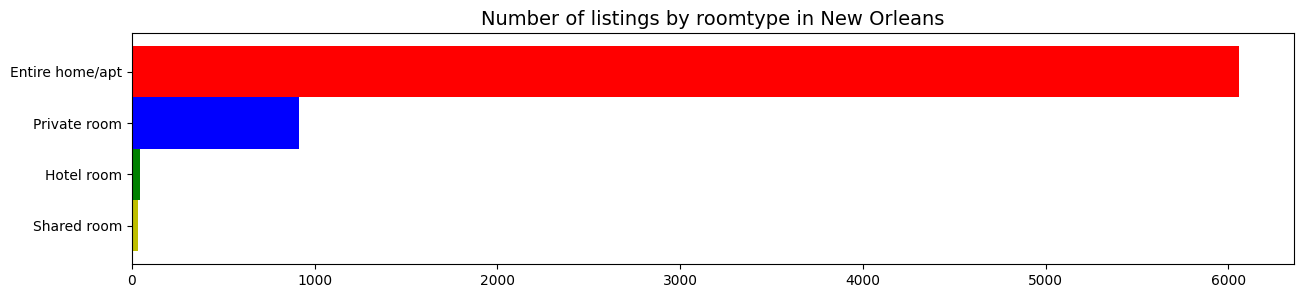

In [19]:
#Histogram 
freq = df_listings['room_type'].value_counts().sort_values(ascending=True)
freq.plot.barh(figsize =(15,3), width=1, color=['y','g','b','r'])
                                            #We give four different colours for our graphs
plt.title("Number of listings by roomtype in New Orleans", fontsize=14)
plt.show()

Entire home/apt is the most common type of listing in new orleans

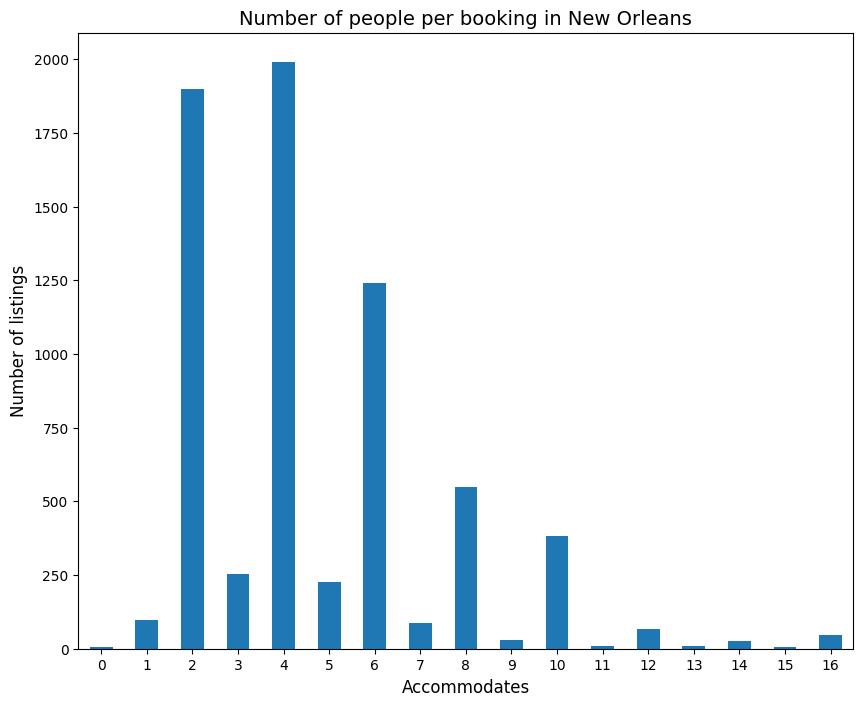

In [39]:
feq = df_listings['accommodates'].value_counts().sort_index()
feq.plot.bar(figsize=(10,8), width=0.5, rot=0)
plt.title('Number of people per booking in New Orleans', fontsize=14)
plt.ylabel('Number of listings', fontsize=12)
plt.xlabel('Accommodates', fontsize=12)
plt.show()

most of the books include 1/2/3 couples

In [40]:
# Predicting prices

In [24]:
df_cal = pd.read_csv('calendar.csv.gz',compression = "gzip")
df_rev = pd.read_csv('reviews.csv.gz',compression = "gzip")

In [25]:
#remove $ sign on the price column and convert to numeric value
listing_calendar = df_cal
listing_calendar['price'] = listing_calendar['price'].apply(lambda x: str(x).replace('$',''))
listing_calendar['price'] = pd.to_numeric(listing_calendar['price'], errors = 'coerce')
df_calendar = listing_calendar.groupby('date')[["price"]].sum()
df_calendar['mean'] = listing_calendar.groupby('date')[["price"]].mean()
df_calendar.columns = ['Total', 'Avg']

In [26]:
#SET DATE AS INDEX
df_calendar2 = listing_calendar.set_index("date")
df_calendar2.index = pd.to_datetime(df_calendar2.index)
df_calendar2 = df_calendar2[['price']].resample('M').mean()

In [27]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [28]:
def dollar_float(x):
    '''
    input: dollar value with string dtype
    output: value in float
    '''
    if type(x)==str:
        x=x[1:].replace(",","")
        x=float(x)
    return x

def perc_float(x):
    '''
    input: % value with string dtype
    output: % value in float
    '''
    if type(x)==str:
        x=x.replace('%','')
        x=float(x)/100.0
    return (x)

In [29]:
df_cal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2574386 entries, 0 to 2574385
Data columns (total 7 columns):
 #   Column          Dtype  
---  ------          -----  
 0   listing_id      int64  
 1   date            object 
 2   available       object 
 3   price           float64
 4   adjusted_price  object 
 5   minimum_nights  float64
 6   maximum_nights  float64
dtypes: float64(3), int64(1), object(3)
memory usage: 137.5+ MB


In [30]:
df_cal.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,19091,2023-03-09,f,60.0,$60.00,1.0,1125.0
1,19091,2023-03-10,f,80.0,$80.00,1.0,1125.0
2,19091,2023-03-11,f,111.0,$111.00,1.0,1125.0
3,19091,2023-03-12,f,60.0,$60.00,1.0,1125.0
4,19091,2023-03-13,f,60.0,$60.00,1.0,1125.0


In [31]:
#Removes rows missing price data since we are interested in price vairability
df_cal.dropna(subset=['price'],inplace=True)

#Convert dollar dtype to float
df_cal['price']=df_cal['price'].apply(lambda x: dollar_float(x))

#Create Year, Month, Day, Day Name columns after convering date into datetime
df_cal['date'] = pd.to_datetime(df_cal['date'],format="%Y-%m-%d")
df_cal['year'] = df_cal['date'].dt.year
df_cal['month'] = df_cal['date'].dt.month
df_cal['day'] = df_cal['date'].dt.day
df_cal['day_name'] = df_cal['date'].dt.day_name()
df_cal['day_num'] = df_cal['date'].dt.weekday

#Covert available to numeric data
df_cal['available'] = df_cal['available'].apply(lambda x:1 if x =='t' else 0)

df_cal.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights,year,month,day,day_name,day_num
0,19091,2023-03-09,0,60.0,$60.00,1.0,1125.0,2023,3,9,Thursday,3
1,19091,2023-03-10,0,80.0,$80.00,1.0,1125.0,2023,3,10,Friday,4
2,19091,2023-03-11,0,111.0,$111.00,1.0,1125.0,2023,3,11,Saturday,5
3,19091,2023-03-12,0,60.0,$60.00,1.0,1125.0,2023,3,12,Sunday,6
4,19091,2023-03-13,0,60.0,$60.00,1.0,1125.0,2023,3,13,Monday,0


In [32]:
df_cal[df_cal.year==2023].groupby('month').available.sum()

month
3      59552
4     105729
5     129942
6     129351
7     132083
8     134915
9      97109
10     90223
11     89945
12     82110
Name: available, dtype: int64

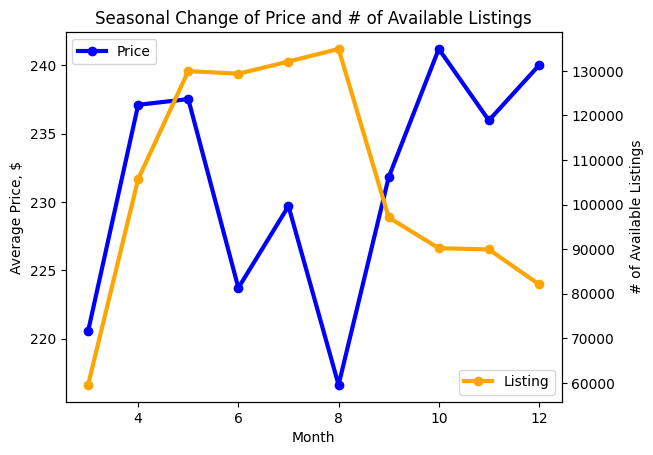

In [33]:
# Plot average price and total number of listings per month to see seasonal patterns
fig,ax = plt.subplots()
ax.plot(df_cal[df_cal.year==2023].groupby(['month']).price.mean(),color='blue', marker='o', linewidth=3, label='Price')
ax.set_xlabel('Month')
ax.set_ylabel('Average Price, $')

ax2 = ax.twinx()
ax2.plot(df_cal[df_cal.year==2023].groupby(['month']).available.sum(), color='orange', marker ='o', linewidth=3, label='Listing')
ax2.set_ylabel('# of Available Listings')

ax.legend(loc=2)
ax2.legend(loc=4)

plt.title('Seasonal Change of Price and # of Available Listings')
plt.show()

(0.0, 400.0)

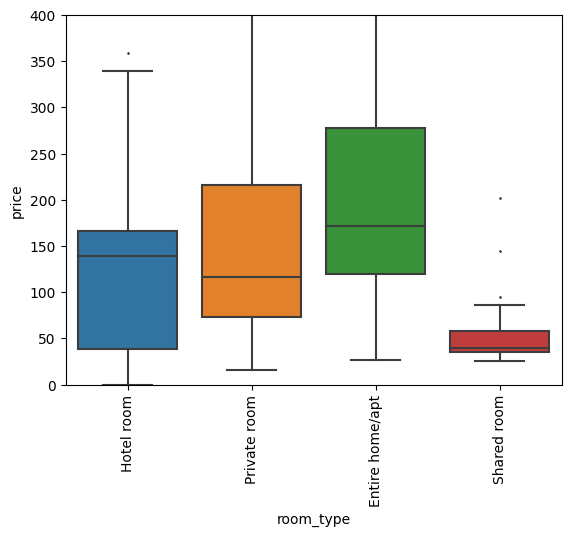

In [38]:
# Entire houses have higher average price.
ax = sns.boxplot(data=df_listings, x='room_type',y='price',fliersize=1)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_ylim(0, 400)

(0.0, 400.0)

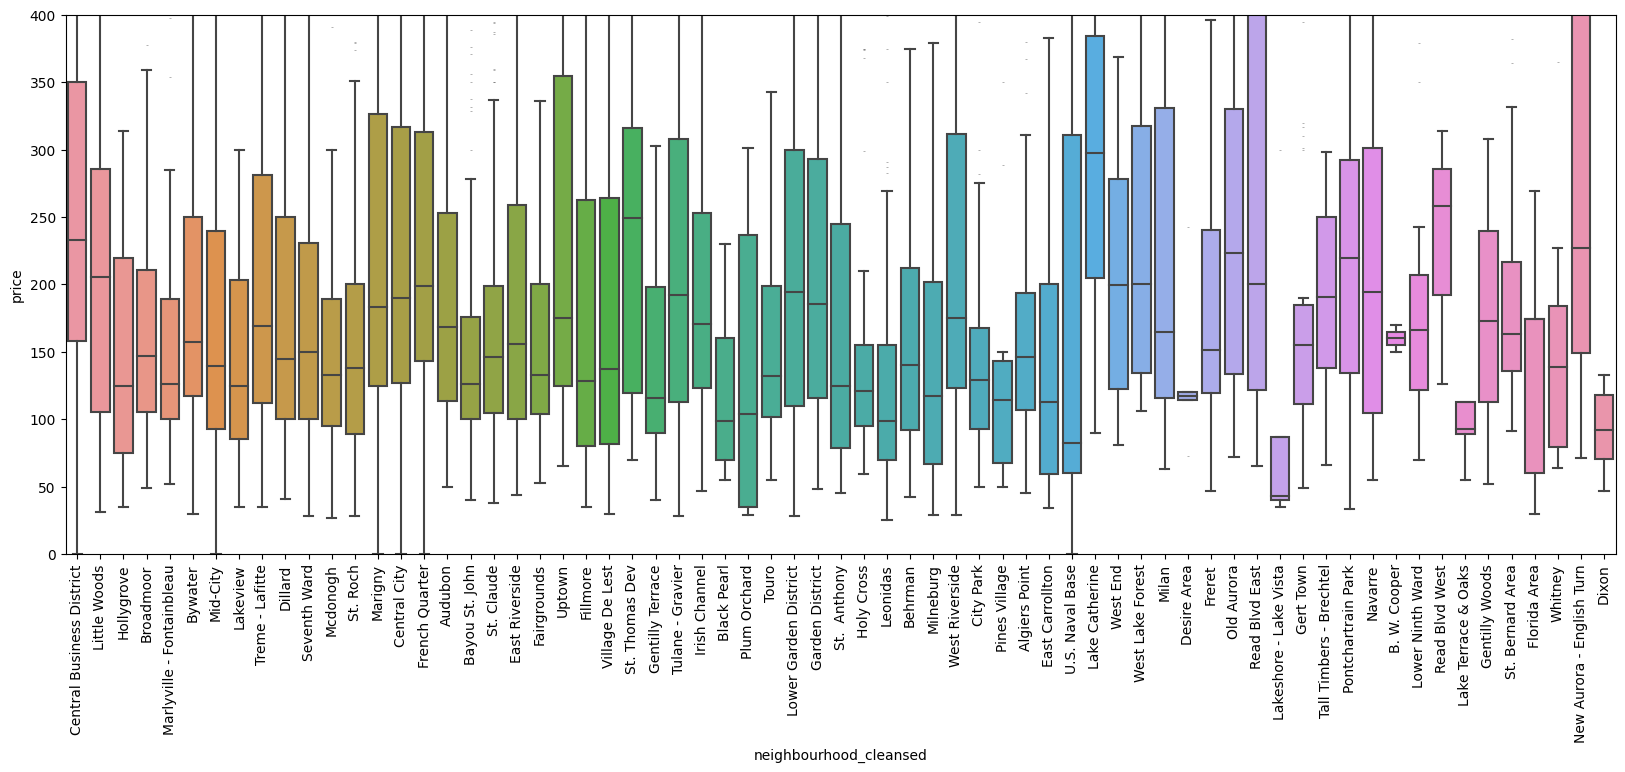

In [ ]:
plt.figure(figsize=(20,7))
ax = sns.boxplot(data=df_list, x='neighbourhood_cleansed',y='price',fliersize=0.1,)

ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_ylim(0, 400)

<Axes: title={'center': 'Missing values per column'}>

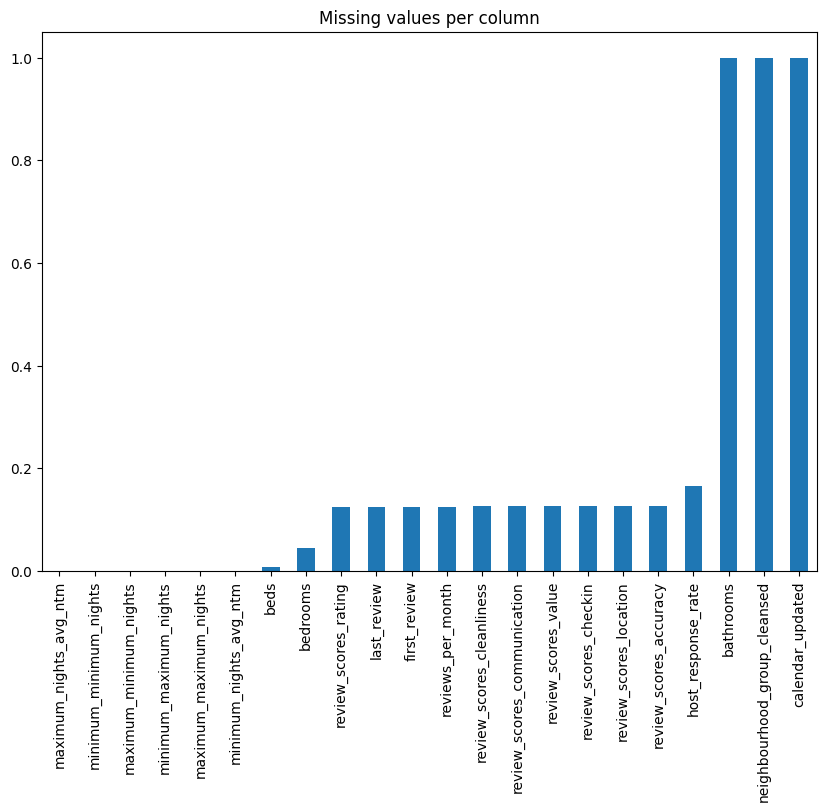

In [ ]:
#show columns with high ratio of missing value
plt.figure(figsize=(10,7))
df_list_missing = df_list.select_dtypes(include=['number']).isnull().mean()
df_list_missing[df_list_missing >0].sort_values().plot.bar(title='Missing values per column')